In [1]:
import os
import json
import numpy as np
from matplotlib import pyplot as plt

In [2]:
uniform_horizon_dir = "../outputs/lift_lowdim_ph_reproduction/2025.04.12_11.32.56_train_diffusion_unet_lowdim_lift_lowdim_16_state_estimator/uniform_horizon/"

AHC_horizon_dir = "../outputs/lift_lowdim_ph_reproduction/2025.04.12_11.32.56_train_diffusion_unet_lowdim_lift_lowdim_16_state_estimator/AHC_total_evaluation_by_seed"

In [3]:
def get_horizon_length_success_rate(folder_dir):
    # Get all folders in uniform_horizon_dir that contain evaluation results
    folder_names = [d for d in os.listdir(folder_dir)]
    
    # folder_names = []
    
    # for d in os.listdir(folder_dir):
    #     if not "0.02" in d:
    #         folder_names.append(d)
    # folder_names.sort(key=lambda x: int(x.split('_')[3])) # Sort by horizon number

    length_and_success_rate = []

    for folder_name in folder_names:
        
        try:
            py_data = json.load(open(os.path.join(folder_dir, folder_name, "eval_log.json")))
            
            for seed in np.arange(100000, 100000+50):
                reward_key = f"test/sim_max_reward_{seed}"
                length_key = f"test/sim_action_horizon_average_length_{seed}"
                
                length_and_success_rate.append(np.array([py_data[length_key], py_data[reward_key]]))

        except Exception as e:
            print(f"Error in {os.path.join(folder_dir, folder_name, 'eval_log.json')}")
            print(e)
    length_and_success_rate = np.stack(length_and_success_rate, axis=0)
    return length_and_success_rate

In [4]:
uniform_length_and_success_rate = get_horizon_length_success_rate(uniform_horizon_dir)
AHC_length_and_success_rate = get_horizon_length_success_rate(AHC_horizon_dir)


In [5]:
unique_times = np.unique(uniform_length_and_success_rate[:, 0].round(2))
bins = unique_times-0.5
bins = np.concatenate([bins, [bins[-1]+1.0, bins[-1]+2.0]])

In [6]:
# Calculate averages and std for each bin
def get_binned_statistics(horizon_times, success, bins):
    bin_indices = np.digitize(horizon_times, bins)
    binned_success_rate = []
    bin_centers = []
    bin_counts = []
    for i in range(min(bin_indices), max(bin_indices)+1):
        mask = bin_indices == i
        if np.any(np.logical_and(mask, success)):
            bin_centers.append((bins[i-1] + bins[i]) / 2)
            binned_success_rate.append(np.mean(success[mask]))
            bin_counts.append(np.sum(mask))
        else:
            binned_success_rate.append(0)
            bin_counts.append(0)
            bin_centers.append((bins[i-1] + bins[i]) / 2)
    
    return np.array(bin_centers), np.array(binned_success_rate), bin_counts

In [7]:
uni_bin_centers, uni_binned_success_rate, uni_bin_counts = get_binned_statistics(uniform_length_and_success_rate[:, 0], uniform_length_and_success_rate[:, 1], bins)
AHC_bin_centers, AHC_binned_success_rate, AHC_bin_counts = get_binned_statistics(AHC_length_and_success_rate[:, 0]+1, AHC_length_and_success_rate[:, 1], bins)

In [8]:
print(AHC_length_and_success_rate[:, 0]+1)

[ 6.54545455  6.3         6.63636364  6.81818182  5.875       6.11111111
  6.33333333  6.08333333  6.125       7.85714286  6.42857143  7.88888889
  5.88888889  5.33333333  6.28571429  6.25        6.71428571  7.2
  6.71428571  6.63636364  5.28571429  7.2         7.14285714  7.11111111
  7.375       6.          6.63636364  6.71428571  7.9         6.90909091
  7.5         7.125       7.28571429  7.4         6.85714286  6.33333333
  7.25        7.77777778  8.77777778  5.75        6.72727273  5.66666667
  6.75        6.81818182  6.6         5.91666667  5.875       6.375
  7.          5.88888889  2.          2.          2.25        2.13043478
  2.          2.03448276  2.          2.          2.04        2.26086957
  2.08        2.19354839  2.          1.96        2.          2.07692308
  2.          2.05882353  2.          2.          2.          2.
  2.09090909  2.33333333  2.08823529  2.21875     2.          2.04347826
  2.1         2.02857143  2.21875     2.          2.11538462  2.04
  2.

In [9]:
print(AHC_bin_centers)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]


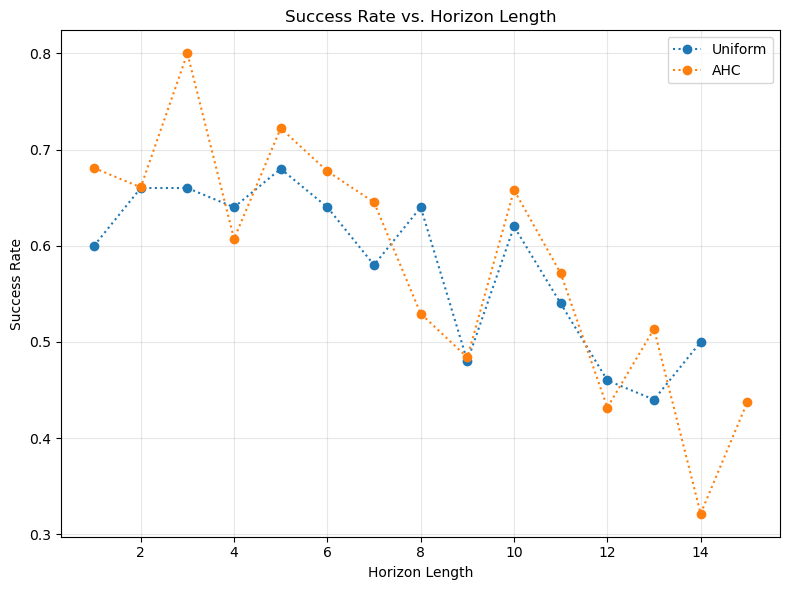

In [10]:
fig, ax1 = plt.subplots(figsize=(8, 6))

ax1.plot(uni_bin_centers, uni_binned_success_rate, 'o:', color='tab:blue', label='Uniform')
ax1.plot(AHC_bin_centers, AHC_binned_success_rate, 'o:', color='tab:orange', label='AHC')
ax1.set_xlabel('Horizon Length')
ax1.set_ylabel('Success Rate')
ax1.set_title('Success Rate vs. Horizon Length')
ax1.legend()
ax1.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [11]:
print(AHC_bin_centers)
print(AHC_bin_counts)

print(np.stack([np.array(AHC_bin_centers), np.array(AHC_bin_counts)], axis=1))

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]
[94, 56, 25, 28, 36, 31, 31, 34, 31, 38, 21, 44, 37, 28, 16]
[[ 1. 94.]
 [ 2. 56.]
 [ 3. 25.]
 [ 4. 28.]
 [ 5. 36.]
 [ 6. 31.]
 [ 7. 31.]
 [ 8. 34.]
 [ 9. 31.]
 [10. 38.]
 [11. 21.]
 [12. 44.]
 [13. 37.]
 [14. 28.]
 [15. 16.]]


In [40]:
import numpy as np
import os
import json

seed_number = 100041

uniform_horizon_dir = "../outputs/lift_lowdim_ph_reproduction/2025.04.12_11.32.56_train_diffusion_unet_lowdim_lift_lowdim_16_state_estimator/uniform_horizon"

AHC_horizon_dir = f"../outputs/lift_lowdim_ph_reproduction/2025.04.12_11.32.56_train_diffusion_unet_lowdim_lift_lowdim_16_state_estimator/AHC_total_evaluation_by_seed"

uniform_horizon_success = []
AHC_horizon_success = []

for horizon in range(1, 14):
    py_data = json.load(open(os.path.join(uniform_horizon_dir, f"eval_disturbance_horizon_{horizon}_distrubance_prob_1.0_vel_0.0017_gripper_dir_near_gripper_0.05_50episodes", "eval_log.json")))
    uniform_horizon_success.append(py_data[f"test/sim_max_reward_{seed_number}"])
    
    AHC_py_data = json.load(open(os.path.join(AHC_horizon_dir, f"eval_AHC_seed_{seed_number}_distrubance_prob_1.0_vel_0.0017_gripper_dir_near_gripper_0.05_50episodes", "eval_log.json")))
    AHC_horizon_success.append(AHC_py_data[f"test/sim_max_reward_{horizon}"])

uniform_horizon_success = np.array(uniform_horizon_success)
AHC_horizon_success = np.array(AHC_horizon_success)

mask = AHC_horizon_success >= 0



print(uniform_horizon_success[mask])
print(AHC_horizon_success[mask])
print(np.array(AHC_horizon_success[mask])-np.array(uniform_horizon_success[mask]))
print(np.sum(AHC_horizon_success[mask])-np.sum(uniform_horizon_success[mask]))



[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.]
2.0


In [2]:
mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

# Get Successrate by seed

In [1]:
import os
import json
import numpy as np
from matplotlib import pyplot as plt

In [6]:
seed_number = 100041

uniform_horizon_dir = "../outputs/lift_lowdim_ph_reproduction/2025.04.12_11.32.56_train_diffusion_unet_lowdim_lift_lowdim_16_state_estimator/uniform_horizon"

AHC_horizon_dir = f"../outputs/lift_lowdim_ph_reproduction/2025.04.12_11.32.56_train_diffusion_unet_lowdim_lift_lowdim_16_state_estimator/AHC_total_evaluation_by_seed"

uniform_horizon_success = []
AHC_horizon_success = []

for seed_number in range(100000, 100000+50):

    for horizon in range(1, 14):
        py_data = json.load(open(os.path.join(uniform_horizon_dir, f"eval_disturbance_horizon_{horizon}_distrubance_prob_1.0_vel_0.0017_gripper_dir_near_gripper_0.05_50episodes", "eval_log.json")))
        uniform_horizon_success.append( \
            np.array([ \
                py_data[f"test/sim_action_horizon_average_length_{seed_number}"], \
                py_data[f"test/sim_max_reward_{seed_number}"] \
            ])\
        )
        
        AHC_py_data = json.load(open(os.path.join(AHC_horizon_dir, f"eval_AHC_seed_{seed_number}_distrubance_prob_1.0_vel_0.0017_gripper_dir_near_gripper_0.05_50episodes", "eval_log.json")))
        AHC_horizon_success.append( \
            np.array([ \
                AHC_py_data[f"test/sim_action_horizon_average_length_{horizon}"], \
                AHC_py_data[f"test/sim_max_reward_{horizon}"], \
            ])\
        )

uniform_horizon_success = np.stack(uniform_horizon_success, axis=0)
AHC_horizon_success = np.stack(AHC_horizon_success, axis=0)
AHC_horizon_success = AHC_horizon_success[AHC_horizon_success[:, 0]>0]

# mask = AHC_horizon_success >= 0



# print(uniform_horizon_success[mask])
# print(AHC_horizon_success[mask])
# print(np.array(AHC_horizon_success[mask])-np.array(uniform_horizon_success[mask]))
# print(np.sum(AHC_horizon_success[mask])-np.sum(uniform_horizon_success[mask]))



In [9]:
unique_times = np.unique(uniform_horizon_success[:, 0].round(2))
bins = unique_times-0.5
bins = np.concatenate([bins, [bins[-1]+1.0, bins[-1]+2.0]])

In [11]:
# Calculate averages and std for each bin
def get_binned_statistics(horizon_times, success, bins):
    bin_indices = np.digitize(horizon_times, bins)
    binned_success_rate = []
    bin_centers = []
    bin_counts = []
    for i in range(min(bin_indices), max(bin_indices)+1):
        mask = bin_indices == i
        if np.any(np.logical_and(mask, success)):
            bin_centers.append((bins[i-1] + bins[i]) / 2)
            binned_success_rate.append(np.mean(success[mask]))
            bin_counts.append(np.sum(mask))
        else:
            binned_success_rate.append(0)
            bin_counts.append(0)
            bin_centers.append((bins[i-1] + bins[i]) / 2)
    
    return np.array(bin_centers), np.array(binned_success_rate), bin_counts

In [13]:
uni_bin_centers, uni_binned_success_rate, uni_bin_counts = get_binned_statistics(uniform_horizon_success[:, 0], uniform_horizon_success[:, 1], bins)
AHC_bin_centers, AHC_binned_success_rate, AHC_bin_counts = get_binned_statistics(AHC_horizon_success[:, 0], AHC_horizon_success[:, 1], bins)

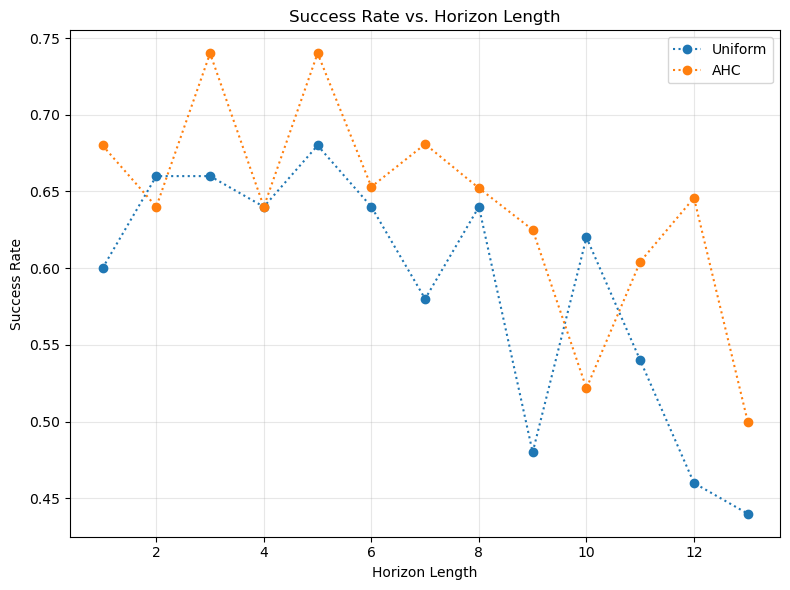

In [14]:
fig, ax1 = plt.subplots(figsize=(8, 6))

ax1.plot(uni_bin_centers, uni_binned_success_rate, 'o:', color='tab:blue', label='Uniform')
ax1.plot(AHC_bin_centers, AHC_binned_success_rate, 'o:', color='tab:orange', label='AHC')
ax1.set_xlabel('Horizon Length')
ax1.set_ylabel('Success Rate')
ax1.set_title('Success Rate vs. Horizon Length')
ax1.legend()
ax1.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [18]:
np.sum((AHC_horizon_success[:, 0] > 9.7) & (AHC_horizon_success[:, 0] < 10.3))

46